In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df = pd.read_csv('games.csv', on_bad_lines='skip')

display(df)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,price_discounted,discount,steam_deck
0,11190,Sherlock Holmes versus Jack the Ripper,2009-12-23,True,False,False,Mostly Positive,78,792,9.99,9.99,9.99,0.0,True
1,20700,Starscape,2008-11-03,True,False,False,Very Positive,81,80,7.99,7.99,7.99,0.0,True
2,94202,"Jamestown: Gunpowder, Treason, & Plot",2011-11-10,True,True,False,Positive,90,10,2.99,2.99,2.99,0.0,True
3,212673,Tom Clancy's Ghost Recon Future Soldier® - Khy...,2013-02-26,True,False,False,Mixed,60,10,9.99,9.99,9.99,0.0,True
4,222520,Champions of Regnum,2013-02-27,True,True,True,Mixed,67,1098,0.00,0.00,0.00,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13464,1760250,Madden NFL 23,2022-08-18,True,False,False,Mixed,49,2362,59.99,59.99,59.99,0.0,True
13465,1770640,Death's Gambit: Afterlife Soundtrack,2021-10-06,False,False,False,Positive,100,10,12.99,12.99,12.99,0.0,True
13466,1943950,Escape the Backrooms,2022-08-11,True,False,False,Very Positive,81,5726,9.99,9.99,9.99,0.0,True
13467,2124040,Department of the Devil,2022-10-24,True,False,False,Positive,100,12,7.99,7.99,7.99,0.0,True


### 2

In [14]:
shape = df.shape
print(f"В датасете {shape[0]} строк и {shape[1]} столбцов")

В датасете 13469 строк и 14 столбцов


In [15]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13469 entries, 0 to 13468
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   app_id            13469 non-null  int64  
 1   title             13469 non-null  object 
 2   date_release      13469 non-null  object 
 3   win               13469 non-null  bool   
 4   mac               13469 non-null  bool   
 5   linux             13469 non-null  bool   
 6   rating            13469 non-null  object 
 7   positive_ratio    13469 non-null  int64  
 8   user_reviews      13469 non-null  int64  
 9   price_final       13469 non-null  float64
 10  price_original    13443 non-null  float64
 11  price_discounted  13443 non-null  float64
 12  discount          13469 non-null  float64
 13  steam_deck        13469 non-null  bool   
dtypes: bool(4), float64(4), int64(3), object(3)
memory usage: 1.1+ MB


None

In [16]:
dataset_statistics = [
    {'name': 'app_id',
     'what': 'айди игры',
     'type_variable': 'метрическая',
     'type_data': 'integer',
     'empty_count': 13469
     },
    {'name': 'title',
     'what': 'название игры',
     'type_variable': 'категориальная-номинальная',
     'type_data': 'string',
     'empty_count': 13469
     },
    {'name': 'date_release',
     'what': 'дату релиза игры',
     'type_variable': 'метрическая',
     'type_data': 'string',
     'empty_count': 13469
     },
    {'name': 'win',
     'what': 'поддержку операционной системы Windows',
     'type_variable': 'категориальная-бинарная',
     'type_data': 'bool',
     'empty_count': 13469
     },
    {'name': 'mac',
     'what': 'поддержку операционной системы MacOS',
     'type_variable': 'категориальная-бинарная',
     'type_data': 'bool',
     'empty_count': 13469
     },
    {'name': 'linux',
     'what': 'поддержку операционной системы Linus',
     'type_variable': 'категориальная-бинарная',
     'type_data': 'bool',
     'empty_count': 13469
     },
    {'name': 'rating',
     'what': 'категорию рейтинга продукта',
     'type_variable': 'категориальная-порядковая',
     'type_data': 'string',
     'empty_count': 13469
     },
    {'name': 'positive_ratio',
     'what': 'долю позитивных отзывов',
     'type_variable': 'метрическая',
     'type_data': 'integer',
     'empty_count': 13469
     },
    {'name': 'user_reviews',
     'what': 'количество оставленных отзывов',
     'type_variable': 'метрическая',
     'type_data': 'integer',
     'empty_count': 13469
     },
    {'name': 'price_final',
     'what': 'окончательную цену в долларах США $',
     'type_variable': 'метрическая',
     'type_data': 'float',
     'empty_count': 13469
     },
    {'name': 'price_original',
     'what': 'цену в долларах США $ до скидки',
     'type_variable': 'метрическая',
     'type_data': 'float',
     'empty_count': 13443
     },
    {'name': 'price_discounted',
     'what': 'цену в долларах США $ после скидки',
     'type_variable': 'метрическая',
     'type_data': 'float',
     'empty_count': 13443
     },
    {'name': 'discount',
     'what': 'значение скидки в процентах',
     'type_variable': 'метрическая',
     'type_data': 'float',
     'empty_count': 13469
     },
    {'name': 'steam_deck',
     'what': 'совместимость с Steam Deck',
     'type_variable': 'категориальная-бинарная',
     'type_data': 'bool',
     'empty_count': 13469
     },
    ]

In [17]:
for item in dataset_statistics:
    print(
        f'{item["name"]}: задаёт {item["what"]}, относится к типу переменной {item["type_variable"]}, относится к типу данных {item["type_data"]} и имеет {df.shape[0] - item["empty_count"]} пустых значений'
    )

app_id: задаёт айди игры, относится к типу переменной метрическая, относится к типу данных integer и имеет 0 пустых значений
title: задаёт название игры, относится к типу переменной категориальная-номинальная, относится к типу данных string и имеет 0 пустых значений
date_release: задаёт дату релиза игры, относится к типу переменной метрическая, относится к типу данных string и имеет 0 пустых значений
win: задаёт поддержку операционной системы Windows, относится к типу переменной категориальная-бинарная, относится к типу данных bool и имеет 0 пустых значений
mac: задаёт поддержку операционной системы MacOS, относится к типу переменной категориальная-бинарная, относится к типу данных bool и имеет 0 пустых значений
linux: задаёт поддержку операционной системы Linus, относится к типу переменной категориальная-бинарная, относится к типу данных bool и имеет 0 пустых значений
rating: задаёт категорию рейтинга продукта, относится к типу переменной категориальная-порядковая, относится к типу да

### 3

In [18]:
df = df.convert_dtypes()
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13469 entries, 0 to 13468
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   app_id            13469 non-null  Int64  
 1   title             13469 non-null  string 
 2   date_release      13469 non-null  string 
 3   win               13469 non-null  boolean
 4   mac               13469 non-null  boolean
 5   linux             13469 non-null  boolean
 6   rating            13469 non-null  string 
 7   positive_ratio    13469 non-null  Int64  
 8   user_reviews      13469 non-null  Int64  
 9   price_final       13469 non-null  Float64
 10  price_original    13443 non-null  Float64
 11  price_discounted  13443 non-null  Float64
 12  discount          13469 non-null  Int64  
 13  steam_deck        13469 non-null  boolean
dtypes: Float64(3), Int64(4), boolean(4), string(3)
memory usage: 1.2 MB


None

### 4

Добавим столбец задающий поддрежку игрой всех операционных систем и Steam Deck

In [19]:
df['all_platforms'] = df['win'] & df['mac'] & df['linux'] & df['steam_deck']

display(df['all_platforms'])

0        False
1        False
2        False
3        False
4         True
         ...  
13464    False
13465    False
13466    False
13467    False
13468    False
Name: all_platforms, Length: 13469, dtype: boolean

### 5

In [20]:
cheap = df['price_final'].quantile(0.25)
expensive = df['price_final'].quantile(0.80)
def f(x):
    if x < cheap:
        return 'Cheap'
    elif x < expensive:
        return 'Average'
    else:
        return 'Expensive'

df2 = df.copy()
df2['price_final'] = df2['price_final'].apply(lambda x : f(x))
display(df2)
print("Примем 25% самых недорогих чисел за дешёвые игры, а 20% самых недешёвых за дорогие, оставшиеся 55% игр имеют среднюю цену")

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,price_discounted,discount,steam_deck,all_platforms
0,11190,Sherlock Holmes versus Jack the Ripper,2009-12-23,True,False,False,Mostly Positive,78,792,Average,9.99,9.99,0,True,False
1,20700,Starscape,2008-11-03,True,False,False,Very Positive,81,80,Average,7.99,7.99,0,True,False
2,94202,"Jamestown: Gunpowder, Treason, & Plot",2011-11-10,True,True,False,Positive,90,10,Average,2.99,2.99,0,True,False
3,212673,Tom Clancy's Ghost Recon Future Soldier® - Khy...,2013-02-26,True,False,False,Mixed,60,10,Average,9.99,9.99,0,True,False
4,222520,Champions of Regnum,2013-02-27,True,True,True,Mixed,67,1098,Cheap,0.0,0.0,0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13464,1760250,Madden NFL 23,2022-08-18,True,False,False,Mixed,49,2362,Expensive,59.99,59.99,0,True,False
13465,1770640,Death's Gambit: Afterlife Soundtrack,2021-10-06,False,False,False,Positive,100,10,Expensive,12.99,12.99,0,True,False
13466,1943950,Escape the Backrooms,2022-08-11,True,False,False,Very Positive,81,5726,Average,9.99,9.99,0,True,False
13467,2124040,Department of the Devil,2022-10-24,True,False,False,Positive,100,12,Average,7.99,7.99,0,True,False


Примем 25% самых недорогих чисел за дешёвые игры, а 20% самых недешёвых за дорогие, оставшиеся 55% игр имеют среднюю цену


### 6

In [21]:
sub = df[10:15]
display(sub.T)

,10,11,12,13,14
app_id,354680,364329,385870,396350,407980
title,Adventures of Bertram Fiddle 1: A Dreadly Busi...,FSX: Steam Edition - WACO YMF5 Add-On,Monstrum - Original Soundtrack,Bleed 2,Sakura Beach 2
date_release,2015-04-02,2015-07-14,2015-07-17,2017-02-08,2015-11-06
win,True,True,True,True,True
mac,True,False,True,True,False
linux,False,False,True,True,True
rating,Very Positive,Positive,Positive,Very Positive,Mostly Positive
positive_ratio,87,87,92,96,79
user_reviews,378,16,14,454,248
price_final,4.99,19.99,4.99,9.99,9.99


### 7

In [22]:
df = df.sort_values(by = ['positive_ratio', 'user_reviews', 'price_final'],ascending=[False, False, True])

display(df.head(20))

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,price_discounted,discount,steam_deck,all_platforms
449,992740,祈風 Inorikaze,2019-02-13,True,False,False,Very Positive,100,305,10.99,10.99,10.99,0,True,False
11209,1176050,秘封旅行 ~ Secret Sealing Travel,2020-10-17,True,False,False,Very Positive,100,183,4.49,5.99,4.49,25,True,False
1464,1290220,Elasto Mania Remastered,2020-05-25,True,False,False,Very Positive,100,171,9.99,9.99,9.99,0,True,False
9354,1082920,missed messages - Fan Pack,2019-05-28,True,True,True,Very Positive,100,124,4.99,4.99,4.99,0,True,True
9381,2205290,流光易逝的夏末 - Fleeting Summer's End,2023-01-06,True,False,False,Very Positive,100,121,2.99,2.99,2.99,0,True,False
876,862710,"Kid,napper - Extra Content",2018-05-31,True,True,True,Very Positive,100,117,0.99,0.99,0.99,0,True,True
12975,1796170,Bunny e-Shop The Art of the Game,2021-12-16,True,True,True,Very Positive,100,106,2.33,2.99,2.33,22,True,True
129,1727830,OPUS: Echo of Starsong Original Soundtrack -Be...,2021-08-31,False,False,False,Very Positive,100,100,7.99,7.99,7.99,0,True,False
13091,1028530,Paper Memories - Comics from Finding Paradise ...,2019-03-08,True,True,True,Very Positive,100,90,1.99,1.99,1.99,0,True,True
8957,1229060,Dungeon and Puzzles,2021-01-14,True,True,False,Very Positive,100,89,7.99,7.99,7.99,0,True,False


### 8

In [69]:
print("Цель исследования -- изучение рынка видеоигр на платформе Steam\n")

print("Задачи:\n- Сбор данных\n - Анализ данных на предмет взаимосвязи различных переменных")

Цель исследования -- изучение рынка видеоигр на платформе Steam

Задачи:
- Сбор данных
 - Анализ данных на предмет взаимосвязи различных переменных


### 9

In [71]:
print("Наши гипотезы:")
print("1. Чем игра дешевле игра, тем больше её скачивают, а значит и оставляют больше отзывов")
print("2. Игры стараются делать доступными для всех операционных систем")
print("3. Windows является наиболее популярной ОС и абсолютное болььшинство игр доступны на ней")

Наши гипотезы:
1. Чем игра дешевле игра, тем больше её скачивают, а значит и оставляют больше отзывов
2. Игры стараются делать доступными для всех операционных систем
3. Windows является наиболее популярной ОС и абсолютное болььшинство игр доступны на ней


### 10

В среднем, чем выше цена игры, тем меньше на неё отзывов оставляют


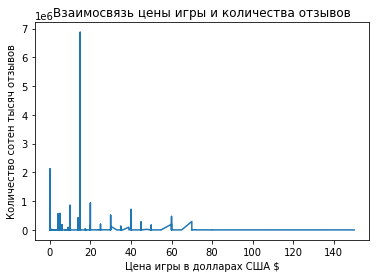

In [40]:
df3 = df.sort_values(by='price_final')

x = df3['price_final']
y = df3['user_reviews']

plt.title('Взаимосвязь цены игры и количества отзывов')
plt.xlabel('Цена игры в долларах США $')
plt.ylabel('Количество сотен тысяч отзывов')
plt.plot(x,y)
print('В среднем, чем выше цена игры, тем меньше на неё отзывов оставляют')

Большинство игры не поддерживают все платформы, причем среди поддерживающих большинство с самым высоким рейтингом. Соотношение рейтингов в среднем такое же, кроме Positive и Very Positive


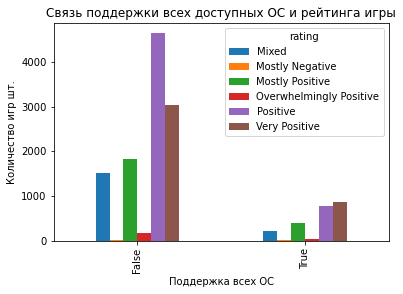

In [66]:
df.groupby('all_platforms')['rating'].value_counts().unstack().plot(kind='bar',title='Связь поддержки всех доступных ОС и рейтинга игры',ylabel = 'Количество игр шт.',xlabel='Поддержка всех ОС')

print("Большинство игры не поддерживают все платформы, причем среди поддерживающих большинство с самым высоким рейтингом. Соотношение рейтингов в среднем такое же, кроме Positive и Very Positive")

Абсолютное большинство игр выпускаются на Windows из чего можно сделать вывод, что это наиболее популярная ОС для игр


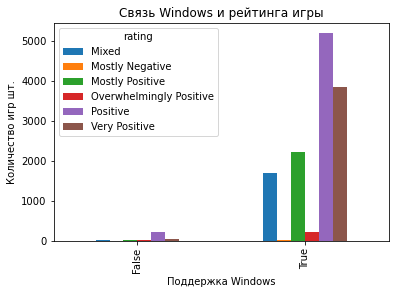

In [68]:
df.groupby('win')['rating'].value_counts().unstack().plot(kind='bar',title='Связь Windows и рейтинга игры',ylabel = 'Количество игр шт.',xlabel='Поддержка Windows')

print("Абсолютное большинство игр выпускаются на Windows из чего можно сделать вывод, что это наиболее популярная ОС для игр")

### 11

### 12

In [72]:
# Тут еще делать нужно
display(df.describe())

,app_id,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,price_discounted,discount,steam_deck,all_platforms
count,1.346900e+04,13469,13469,13469,13469.000000,1.346900e+04,13469.000000,13443.000000,13443.000000,13469.000000,13469,13469
unique,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1,2
top,NaN,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,True,False
freq,NaN,13192,9509,10747,NaN,NaN,NaN,NaN,NaN,NaN,13469,11182
mean,9.756635e+05,NaN,NaN,NaN,83.520974,2.979550e+03,8.486990,9.188369,8.492626,8.293043,NaN,NaN
std,5.608340e+05,NaN,NaN,NaN,12.831449,7.037265e+04,9.346087,9.713703,9.348321,22.459214,NaN,NaN
min,4.400000e+02,NaN,NaN,NaN,24.000000,1.000000e+01,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,4.894600e+05,NaN,NaN,NaN,77.000000,2.000000e+01,2.490000,2.990000,2.490000,0.000000,NaN,NaN
50%,9.104500e+05,NaN,NaN,NaN,86.000000,4.700000e+01,5.990000,6.990000,5.990000,0.000000,NaN,NaN
75%,1.419290e+06,NaN,NaN,NaN,93.000000,1.460000e+02,9.990000,11.990000,9.990000,0.000000,NaN,NaN


### 13

### 14

### 15